In [1]:
import os
import numpy as np
from PIL import Image
from IPython.display import display

data_path = 'raw_salt/'

image_width = 128
image_height = 128

In [2]:
img_data_path = os.path.join(data_path, 'images')
mask_data_path = os.path.join(data_path, 'masks')

print(img_data_path)
print(mask_data_path)


raw_salt/images
raw_salt/masks


In [3]:
images = sorted(os.listdir(img_data_path))
masks = sorted(os.listdir(mask_data_path))
num_images = len(images)
num_masks = len(masks)
print('number of images:',num_images , num_masks)

number of images: 4000 4000


In [9]:
imgs_array = np.ndarray((num_images, image_width, image_height), dtype=np.uint8)
imgs_mask_array = np.ndarray((num_masks, image_width, image_height), dtype=np.uint8)

In [10]:
print('Creating trainign images arrays...')
n = 0
good_imgs=[]
empty_imgs=[]
for image_name in images:
    #print('reading image %s    %d' % (image_name,n+1))
    img = Image.open(os.path.join(img_data_path,image_name)).convert('L') 
    if np.max(np.array(img))-np.min(np.array(img))==0:
        empty_imgs.append(image_name)
    else:
        good_imgs.append(image_name)
        img = np.array(img.resize((image_height,image_width)))
        imgs_array[n] = img
        n +=1

np.save('imgs_train.npy', imgs_array[0:len(good_imgs)])
print(len(empty_imgs),len(good_imgs),imgs_array.shape)


n = 0
for image_name in good_imgs:
    #print('reading mask %s    %d' % (image_name,n+1))
    img = Image.open(os.path.join(mask_data_path,image_name)).convert('L')
    img = np.array(img.resize((image_height,image_width)))
    imgs_mask_array[n] = img
    n +=1
  
np.save('imgs_mask_train.npy', imgs_mask_array[0:len(good_imgs)])
print('finished saving image arrays.')

print(imgs_mask_array.shape)

Creating trainign images arrays...
80 3920 (4000, 128, 128)
finished saving image arrays.
(4000, 128, 128)


In [7]:
imgs_array[0:len(good_imgs)].shape

(3920, 128, 128)

(3516, 128, 128)


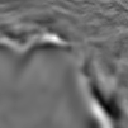

(3516, 128, 128)


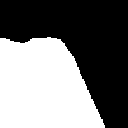

In [11]:
print(imgs_array.shape)
w=Image.fromarray(imgs_array[20].reshape(image_width,image_width))
display(w)

print(imgs_array.shape)
w=Image.fromarray(imgs_mask_array[20].reshape(image_width,image_width))
display(w)


In [15]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [32]:
a=['ab','bb','cc']

In [33]:
print(a)

['ab', 'bb', 'cc']


In [34]:
a.index('cc')

2

In [36]:
del a[2]

In [37]:
a

['ab', 'bb']

In [53]:
cleaned_masks=masks
for im in empty_imgs:
    print(im)
    cleaned_masks.remove(im)

05b69f83bf.png


ValueError: list.remove(x): x not in list

In [58]:
empty_imgs

['05b69f83bf.png',
 '0d8ed16206.png',
 '10833853b3.png',
 '135ae076e9.png',
 '1a7f8bd454.png',
 '1b0d74b359.png',
 '1c0b2ceb2f.png',
 '1efe1909ed.png',
 '1f0b16aa13.png',
 '1f73caa937.png',
 '20ed65cbf8.png',
 '287b0f197f.png',
 '2fb6791298.png',
 '37df75f3a2.png',
 '3ee4de57f8.png',
 '3ff3881428.png',
 '40ccdfe09d.png',
 '423ae1a09c.png']

In [57]:
good_imgs

['000e218f21.png',
 '003c477d7c.png',
 '00441f1cf2.png',
 '0050766ae2.png',
 '005b452274.png',
 '0061281eea.png',
 '008a50a2ec.png',
 '00950d1627.png',
 '00a3af90ab.png',
 '00cda0328c.png',
 '0108518d1e.png',
 '010ee525b6.png',
 '0115703825.png',
 '01323211a0.png',
 '016fc8031c.png',
 '019afb4b4e.png',
 '01b5362cce.png',
 '01c033e116.png',
 '01c2045d03.png',
 '020376e68e.png',
 '020678ec1b.png',
 '02117a400e.png',
 '021494f3aa.png',
 '02206b234e.png',
 '022b1b01be.png',
 '023d486fba.png',
 '0243477802.png',
 '0249c49180.png',
 '026b509cd4.png',
 '026f97575b.png',
 '0280db420c.png',
 '0280deb8ae.png',
 '029c321179.png',
 '02adf272e9.png',
 '02d40993ab.png',
 '03049b14ca.png',
 '0304e9ac37.png',
 '03511989ac.png',
 '0389fc6012.png',
 '03a9a9f615.png',
 '03be56aa9a.png',
 '03c9b5ffe8.png',
 '03eed26d3e.png',
 '0401ae15d3.png',
 '04182ced8e.png',
 '041925f04c.png',
 '04234be388.png',
 '0429d9759b.png',
 '042c3d4e03.png',
 '04315b9a64.png',
 '044106f759.png',
 '045c5516a2.png',
 '0461a2fb30